# Data info

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

This data set consists of the marks secured by the students in various subjects.
<br><br>
**Acknowledgements**

http://roycekimmons.com/tools/generated_data/exams
<br><br>
**Inspiration**
<br>
To understand the influence of the parents background, test preparation etc on students performance

## Import Data

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# Unique values in each column
for col in df.select_dtypes(include="object").columns:
    print(col, df[col].unique())

gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test preparation course ['none' 'completed']


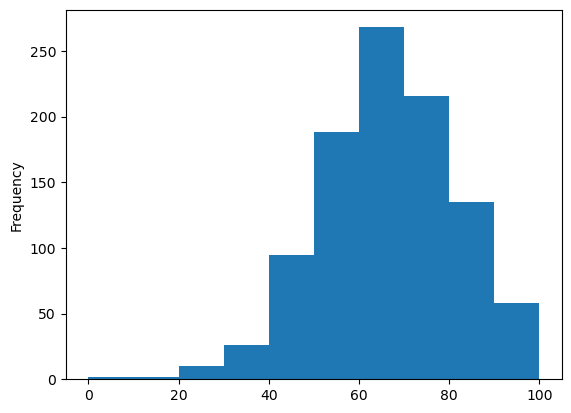

In [10]:
df['math score'].plot.hist();

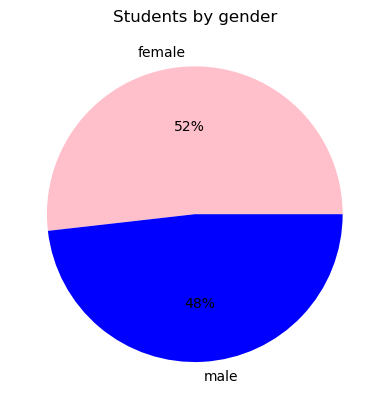

In [36]:
df['gender'].value_counts().plot(kind="pie", autopct='%1.0f%%', colors=["pink","blue"])
plt.ylabel(None)
plt.title("Students by gender");

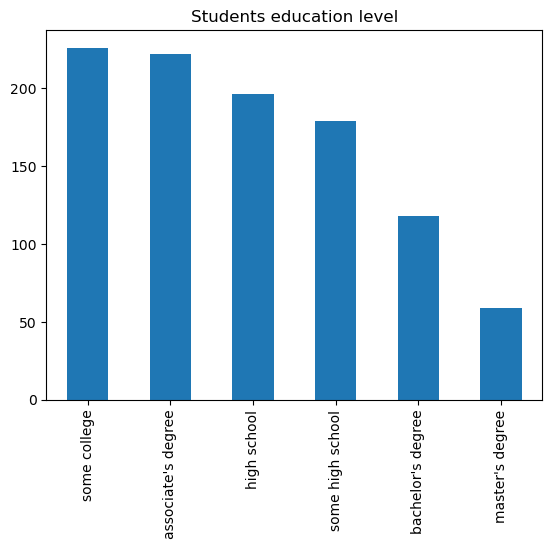

In [40]:
df['parental level of education'].value_counts().plot(kind="bar")
plt.title("Students education level");

In [ ]:
ax=df[["math score", "reading score", "writing score" , "gender"]].groupby("gender").mean().plot(kind="bar",color=["brown","blue","yellow"],title="student prformance by gender", xlabel ="gender", ylabel="score")
plt.xticks(rotation=0)

ax.bar_label(ax.containers[0],color="darkred",fontsize=7)
ax.bar_label(ax.containers[1],color="blue",fontsize=7)
ax.bar_label(ax.containers[2],color="black",fontsize=6)
plt.legend(fontsize=7)
plt.title("Students Performance by gender",color="blue")
plt.xlabel("gender",color="blue")
plt.ylabel("Students Performance",color="blue")

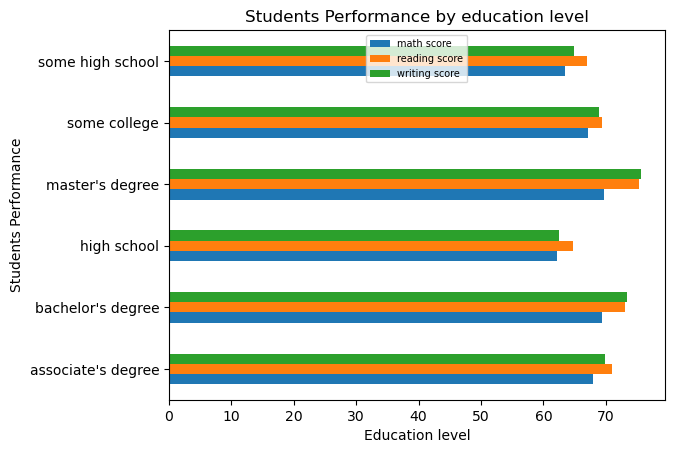

In [76]:
ax = df[["math score", "reading score", "writing score", "parental level of education"]].groupby("parental level of education").mean()
ax.plot(kind="barh", title="Student performance by education level")

plt.legend(fontsize=7, loc='upper center')
plt.title("Students Performance by education level")
plt.xlabel("Education level")
plt.ylabel("Students Performance");

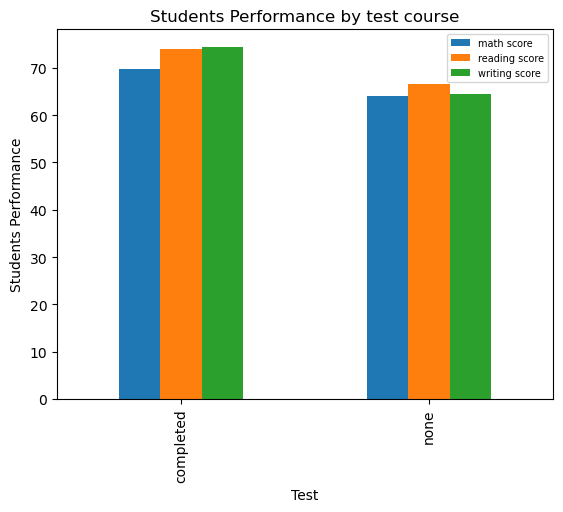

In [81]:
ax = df[["math score", "reading score", "writing score", "test preparation course"]].groupby("test preparation course").mean()
ax.plot(kind="bar", title="Student performance by test course")

plt.legend(fontsize=7)
plt.title("Students Performance by test course")
plt.xlabel('Test')
plt.ylabel("Students Performance");

## Modelling

In [96]:
X = df.drop('math score', axis=1)
y = df['math score']

In [97]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [98]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(), cat_features),
         ("StandardScaler", StandardScaler(), num_features)        
    ]
)

In [99]:
X = preprocessor.fit_transform(X)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 19), (800,), (200, 19), (200,))

In [107]:
def scores(true, preds):
    r2_square = r2_score(true, preds)
    mae = mean_absolute_error(true, preds)
    rmse = np.sqrt(mean_squared_error(true, preds))
    return mae, rmse, r2_square

In [115]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_r2_scores = {}
for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    y_preds = model.predict(X_test)
    
    mae, rmse, r2 = scores(y_test, y_preds)
    
    model_r2_scores[name] = r2
    print(name)
    print("RMSE: {:.4f}".format(rmse))
    print("MAE: {:.4f}".format(mae))
    print("R2 Score: {:.4f}".format(r2))
    print("\n")

Linear Regression
RMSE: 5.1679
MAE: 4.0779
R2 Score: 0.8669


Lasso
RMSE: 5.7965
MAE: 4.5002
R2 Score: 0.8325


Ridge
RMSE: 5.1613
MAE: 4.0678
R2 Score: 0.8672


K-Neighbors Regressor
RMSE: 6.6372
MAE: 5.0690
R2 Score: 0.7804


Decision Tree
RMSE: 7.7936
MAE: 6.0600
R2 Score: 0.6972


Random Forest Regressor
RMSE: 5.3794
MAE: 4.1801
R2 Score: 0.8558


XGBRegressor
RMSE: 6.5211
MAE: 5.1133
R2 Score: 0.7880


CatBoosting Regressor
RMSE: 5.5161
MAE: 4.3588
R2 Score: 0.8483


AdaBoost Regressor
RMSE: 5.8396
MAE: 4.5835
R2 Score: 0.8300




In [120]:
pd.DataFrame(model_r2_scores.items(), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.867211
0,Linear Regression,0.866874
5,Random Forest Regressor,0.855754
7,CatBoosting Regressor,0.848329
1,Lasso,0.832517
8,AdaBoost Regressor,0.830019
6,XGBRegressor,0.788024
3,K-Neighbors Regressor,0.780412
4,Decision Tree,0.697230


In [127]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
r2_score(y_test, y_pred)

0.8668740228188131

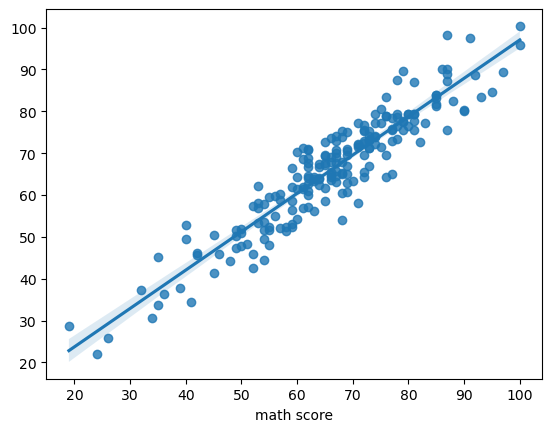

In [132]:
sns.regplot(x=y_test, y=y_pred);

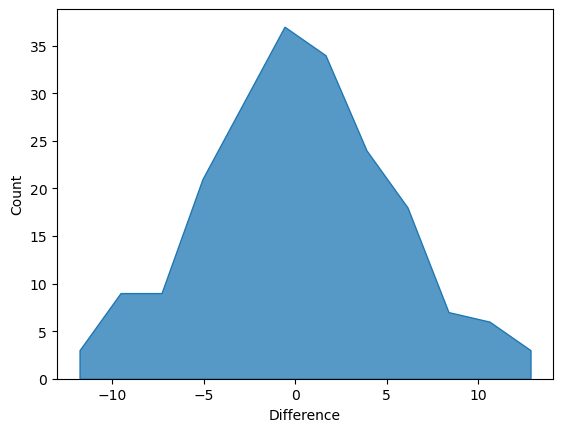

In [154]:
res = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
sns.histplot(res['Difference'], element = 'poly');